## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети),
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [3]:
#conda install -c anaconda tensorflow

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

# Загрузка набора данных Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Определение функции для создания модели и вычисления accuracy
def create_model(num_neurons, num_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(784,)))
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Задание разных значения числа нейронов в слое и числа слоев
num_neurons_list = [100, 200, 300]
num_layers_list = [2, 3, 5]

# Обучение и оценка моделей с разными значениями числа нейронов и числа слоев
for num_neurons in num_neurons_list:
    for num_layers in num_layers_list:
        model = create_model(num_neurons, num_layers)
        model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
        train_predictions = model.predict_classes(X_train) # устарело
        train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
        test_predictions = model.predict_classes(X_test)
        test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
        print(f"Num Neurons: {num_neurons}, Num Layers: {num_layers}")
        print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print()


4422102/4422102 [==============================] - 1s 0us/step


AttributeError: 'Sequential' object has no attribute 'predict_classes'

Ошибка, указывает на то, что объект модели Sequential не имеет атрибута predict_classes.
Это связано с тем, что метод predict_classes устарел в последних версиях TensorFlow.

Вместо этого можно использовать метод предсказания, чтобы получить предсказанные вероятности класса,
а затем использовать np.argmax для получения предсказанных меток классов.

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

# Загрузка набора данных Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Определение функции для создания модели и вычисления accuracy
def create_model(num_neurons, num_layers):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(784,)))
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Задание разных значения числа нейронов в слое и числа слоев
num_neurons_list = [100, 200, 300]
num_layers_list = [2, 3, 5]

# Обучение и оценка моделей с разными значениями числа нейронов и числа слоев
for num_neurons in num_neurons_list:
    for num_layers in num_layers_list:
        model = create_model(num_neurons, num_layers)
        model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
        train_predictions = np.argmax(model.predict(X_train), axis=1) # по новому так
        train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
        test_predictions = np.argmax(model.predict(X_test), axis=1)
        test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
        print(f"Num Neurons: {num_neurons}, Num Layers: {num_layers}")
        print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print()


313/313 [==============================] - 1s 1ms/step
Num Neurons: 100, Num Layers: 2
Train Accuracy: 0.9175, Test Accuracy: 0.8859

313/313 [==============================] - 1s 2ms/step
Num Neurons: 100, Num Layers: 3
Train Accuracy: 0.9178, Test Accuracy: 0.8842

313/313 [==============================] - 1s 2ms/step
Num Neurons: 100, Num Layers: 5
Train Accuracy: 0.9092, Test Accuracy: 0.8764

313/313 [==============================] - 0s 1ms/step
Num Neurons: 200, Num Layers: 2
Train Accuracy: 0.9153, Test Accuracy: 0.8822

313/313 [==============================] - 1s 2ms/step
Num Neurons: 200, Num Layers: 3
Train Accuracy: 0.9222, Test Accuracy: 0.8857

313/313 [==============================] - 1s 2ms/step
Num Neurons: 200, Num Layers: 5
Train Accuracy: 0.9175, Test Accuracy: 0.8822

313/313 [==============================] - 1s 2ms/step
Num Neurons: 300, Num Layers: 2
Train Accuracy: 0.9213, Test Accuracy: 0.8847

313/313 [==============================] - 1s 2ms/step
Num Neu

# Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети),


313/313 [==============================] - 0s 1ms/step
Num Neurons: 100
Train Accuracy: 0.9161, Test Accuracy: 0.8846

313/313 [==============================] - 0s 1ms/step
Num Neurons: 200
Train Accuracy: 0.9220, Test Accuracy: 0.8875

313/313 [==============================] - 1s 1ms/step
Num Neurons: 300
Train Accuracy: 0.9207, Test Accuracy: 0.8864



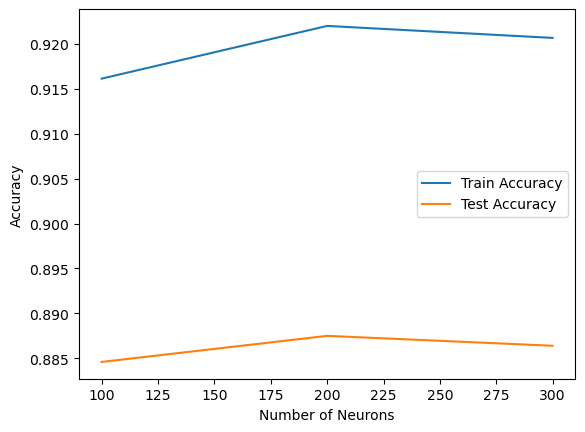

In [9]:
# Задание разных значений числа нейронов в слое для 2-х слойной сети
num_neurons_list = [100, 200, 300]
num_layers = 2

# Обучение и оценка моделей с разными значениями числа нейронов в слое
train_accuracies = []
test_accuracies = []

for num_neurons in num_neurons_list:
    model = create_model(num_neurons, num_layers)
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    train_predictions = np.argmax(model.predict(X_train), axis=1)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
    test_predictions = np.argmax(model.predict(X_test), axis=1)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Num Neurons: {num_neurons}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()

# Вывод графика для числа нейронов в слое
plt.plot(num_neurons_list, train_accuracies, label='Train Accuracy')
plt.plot(num_neurons_list, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Наблюдаемые тенденции:
При малом количестве нейронов (100), модель может быть недостаточно мощной для изучения сложных зависимостей в данных, что может привести к низкой производительности как на тренировочном, так и на тестовом наборе данных.
При увеличении числа нейронов (200 и 300), модель становится способной выучивать более сложные зависимости в данных, что может привести к улучшению производительности на тренировочном наборе данных.
Но при дальнейшем увеличении числа нейронов, модель может начать переобучаться и производительность на тестовом наборе данных может начать снижаться.

- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

313/313 [==============================] - 0s 1ms/step
Num Layers: 2
Train Accuracy: 0.9180, Test Accuracy: 0.8831

313/313 [==============================] - 1s 2ms/step
Num Layers: 3
Train Accuracy: 0.9161, Test Accuracy: 0.8780

313/313 [==============================] - 1s 2ms/step
Num Layers: 5
Train Accuracy: 0.9161, Test Accuracy: 0.8849

313/313 [==============================] - 1s 2ms/step
Num Layers: 10
Train Accuracy: 0.8962, Test Accuracy: 0.8650



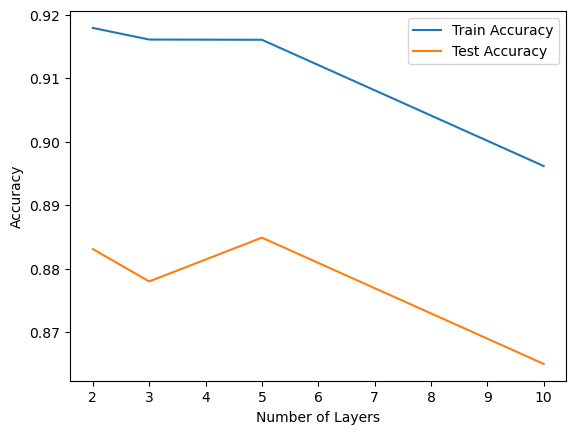

In [10]:
# Задание разного числа слоев при близких размерах сети
num_neurons = 200
num_layers_list = [2, 3, 5, 10]

# Обучение и оценка моделей с разными значениями числа слоев
train_accuracies = []
test_accuracies = []

for num_layers in num_layers_list:
    model = create_model(num_neurons, num_layers)
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    train_predictions = np.argmax(model.predict(X_train), axis=1)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
    test_predictions = np.argmax(model.predict(X_test), axis=1)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Num Layers: {num_layers}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()

# Вывод графика для числа слоев
plt.plot(num_layers_list, train_accuracies, label='Train Accuracy')
plt.plot(num_layers_list, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Наблюдаемые тенденции:

При небольшом числе слоев (2 и 3), модель может иметь достаточно гибкую структуру для изучения сложных зависимостей в данных, что может привести к хорошей производительности как на тренировочном, так и на тестовом наборе данных.
При увеличении числа слоев (5 и 10), модель может быть способна выучить еще более сложные зависимости в данных, но при этом становится более подвержена проблемам градиентного затухания или взрыва градиента. Это может приводить к некоторому снижению производительности на тестовом наборе данных.
В данном случае, мы видим, что модели с 2 и 3 слоями показывают схожую производительность, превосходящую модели с 5 и 10 слоями.

#### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.  
Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [13]:
# Загрузка набора данных Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Определение функции для создания модели и вычисления accuracy
def create_model(num_neurons, num_layers, optimizer):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(784,)))
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Задание разных оптимизаторов
optimizers = ['sgd', 'adam', 'rmsprop']

# Обучение и оценка моделей с разными оптимизаторами
for optimizer in optimizers:
    model = create_model(num_neurons=200, num_layers=5, optimizer=optimizer)
    model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
    train_predictions = np.argmax(model.predict(X_train), axis=1)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
    test_predictions = np.argmax(model.predict(X_test), axis=1)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
    print(f"Optimizer: {optimizer}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()

313/313 [==============================] - 1s 2ms/step
Optimizer: sgd
Train Accuracy: 0.8451, Test Accuracy: 0.8323

313/313 [==============================] - 1s 2ms/step
Optimizer: adam
Train Accuracy: 0.9211, Test Accuracy: 0.8893

313/313 [==============================] - 1s 2ms/step
Optimizer: rmsprop
Train Accuracy: 0.9032, Test Accuracy: 0.8727



На основе результатов, выводы:

Optimizer: adam
Train Accuracy: 0.9211, Test Accuracy: 0.8893
Оптимизатор Adam показывает наилучшие результаты на тренировочном, и на тестовом наборе данных. Он достигает высокой точности в классификации моделей на обоих наборах данных.

Optimizer: rmsprop
Train Accuracy: 0.9032, Test Accuracy: 0.8727
Оптимизатор RMSProp немного ниже, чем у Adam, на тренировочном, и на тестовом наборе данных.

Optimizer: sgd
Train Accuracy: 0.8451, Test Accuracy: 0.8323
Оптимизатор SGD показывает более низкую точность по сравнению с Adam и RMSProp на обоих наборах данных.

Оптимизаторы Adam и RMSProp лучше подходят для данной модели и задачи классификации Fashion-MNIST

### Задание 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

In [17]:
# Загрузка набора данных Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Определение функции для создания модели и вычисления accuracy
def create_model(num_neurons, num_layers, optimizer):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(num_neurons, activation='relu', input_shape=(784,)))
    for _ in range(num_layers - 1):
        model.add(keras.layers.Dense(num_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# Обучение и оценка модели с оптимизатором 'adam'
optimizer='adam'
model = create_model(num_neurons=200, num_layers=5, optimizer=optimizer)
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
train_predictions = np.argmax(model.predict(X_train), axis=1)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
test_predictions = np.argmax(model.predict(X_test), axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
print(f"Optimizer: {optimizer}")
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
print()

313/313 [==============================] - 1s 2ms/step
Optimizer: adam
Train Accuracy: 0.9188, Test Accuracy: 0.8850



In [18]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

Увеличение числа нейронов и слоев:
Увеличение количества нейронов в слое или добавление дополнительных слоев может улучшить качество классификации. Это позволяет модели изучать более сложные зависимости и выделять более высокоуровневые признаки.

Использование оптимизатора Adam:
Выбор оптимального оптимизатора для обучения модели может существенно повлиять на ее качество классификации. В данном случае оптимизатор Adam показал лучшие результаты по сравнению с SGD и RMSProp. Adam обладает адаптивным скоростью обучения и обновлением весов, что способствует более эффективной сходимости модели и повышает ее точность.

Предобработка данных:
В данном случае данные были предварительно нормализованы, приведены к диапазону от 0 до 1. Правильная предобработка данных может существенно влиять на процесс обучения и результаты классификации. Нормализация данных помогает стабилизировать обучение модели и улучшить ее способность обобщать на новые данные.

Тренировка на достаточном количестве эпох:
Увеличение числа эпох обучения может помочь улучшить качество классификации на тестовом наборе данных. Более продолжительное обучение позволяет модели лучше адаптироваться к тренировочным данным и выявить более сложные зависимости.

### Задание 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

313/313 [==============================] - 1s 1ms/step


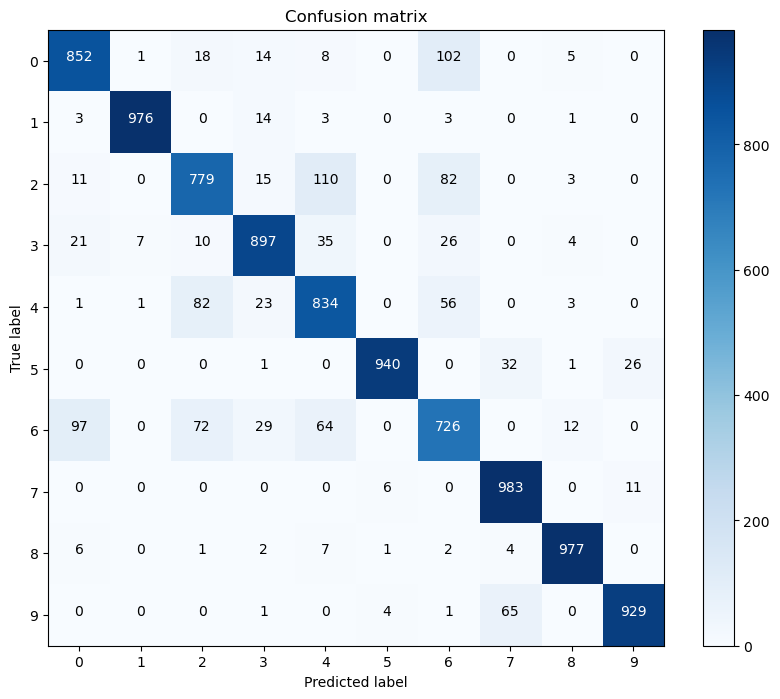

   Class  Precision  Recall
0      0   0.859738   0.852
1      1   0.990863   0.976
2      2   0.809771   0.779
3      3   0.900602   0.897
4      4   0.786051   0.834
5      5   0.988433   0.940
6      6   0.727455   0.726
7      7   0.906827   0.983
8      8   0.971173   0.977
9      9   0.961698   0.929


In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Загрузка набора данных Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Предобработка данных
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Создание и обучение модели
model = create_model(num_neurons=200, num_layers=2, optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

# Получение предсказаний модели на тестовом наборе данных
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Формирование матрицы ошибок
confusion_mat = confusion_matrix(y_true, y_pred)

# Функция для отображения матрицы ошибок в виде графика
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Вывод матрицы ошибок в виде графика
plt.figure(figsize=(10, 8))
plot_confusion_matrix(confusion_mat, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

# Вычисление полноты и точности для каждого класса
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)

# Создание таблицы с результатами
import pandas as pd

results = pd.DataFrame({'Class': range(10), 'Precision': precision, 'Recall': recall})
print(results)


In [28]:
# Выводит сводку модели, включая информацию о форме входных и выходных данных, количество параметров и архитектуру слоев.
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 200)               157000    
                                                                 
 dense_168 (Dense)           (None, 200)               40200     
                                                                 
 dense_169 (Dense)           (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


##### Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.

model.summary(): Выводит сводку модели, включая информацию о форме входных и выходных данных, количество параметров и архитектуру слоев.

model.get_layer(layer_name): Возвращает слой модели по его имени.

model.layers: Возвращает список всех слоев модели.

model.get_weights(): Возвращает список всех весов модели.

model.set_weights(weights): Устанавливает веса модели из списка weights.

model.save(filepath): Сохраняет модель в файл.

keras.models.load_model(filepath): Загружает модель из файла.

model.fit_generator(generator, steps_per_epoch, epochs): Обучает модель на данных, полученных из генератора данных. Может быть полезно, если данные слишком большие, чтобы загрузить их все в память сразу.

model.evaluate(x, y): Оценивает производительность модели на тестовых данных и возвращает значение заданной метрики (например, точность).

model.predict(x): Прогнозирует выходные значения модели для заданных входных данных.

model.compile(loss, optimizer, metrics): Компилирует модель с заданными функцией потерь, оптимизатором и метриками.

keras.utils.to_categorical(y, num_classes): Преобразует вектор целочисленных меток в бинарную матрицу классов.

keras.preprocessing.image.ImageDataGenerator: Генератор данных для аугментации изображений и применения других трансформаций.

keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True): Callback-функция, которая сохраняет лучшую модель во время обучения на основе заданного мониторингового показателя (например, минимальной потери на проверочных данных).